In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Global parameters

In [2]:
# Transparency of Histograms
transp = 0.5

In [3]:
# Set default options for paper
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'white'}
plt.rcParams.update(params)
plt.style.context('default')

In [4]:
feature_names=[r'$p_{T,jet}$',
               r'$\eta(jet)$',
               r'$\phi(jet)$',
               r'$m_{jet}$',
               r'$m_{jet,sd}$',
               r'$\tau_{1}^{(0.5)}$',
               r'$\tau_{2}^{(0.5)}$',
               r'$\tau_{3}^{(0.5)}$',
               r'$\tau_{1,sd}^{(0.5)}$',
               r'$\tau_{2,sd}^{(0.5)}$',
               r'$\tau_{3,sd}^{(0.5)}$',
               r'$\tau_{1}^{(1)}$',
               r'$\tau_{2}^{(1)}$',
               r'$\tau_{3}^{(1)}$',
               r'$\tau_{1,sd}^{(1)}$',
               r'$\tau_{2,sd}^{(1)}$',
               r'$\tau_{3,sd}^{(1)}$',
               r'$\tau_{1}^{(1.5)}$',
               r'$\tau_{2}^{(1.5)}$',
               r'$\tau_{3}^{(1.5)}$',
               r'$\tau_{1,sd}^{(1.5)}$',
               r'$\tau_{2,sd}^{(1.5)}$',
               r'$\tau_{3,sd}^{(1.5)}$',
               r'$\tau_{1}^{(2)}$',
               r'$\tau_{2}^{(2)}$',
               r'$\tau_{3}^{(2)}$',
               r'$\tau_{1,sd}^{(2)}$',
               r'$\tau_{2,sd}^{(2)}$',
               r'$\tau_{3,sd}^{(2)}$',
               r'$N_{ch}$',
               r'$N_{neut}$',
               r'$N_{\gamma}$',
               r'$N_{e}$',
               r'$N_{\mu}$',
               r'$\phi_{pull}$',
               r'$\beta_{3}$',
               r'$\beta_{3}^{g}$',
               r'$\tau_{2} / \tau_{1}$'
              ]

## Define Functions

In [65]:
def Draw_HistoGram(feat,bins,minx,maxx, legend_loc = 'best'):
    tick_width = (maxx-minx)/5
    ii = feat_all.index(feat)
    fig, axs = plt.subplots(1, 1, tight_layout=True,figsize=(7.5,7.5))
    data_train_sig = data_train[feat][ind_train_sig].flatten()
    data_train_bkg = data_train[feat][ind_train_bkg].flatten()
    data_test_sig = data_test[feat][ind_test_sig].flatten()
    data_test_bkg = data_test[feat][ind_test_bkg].flatten()
    axs.hist(data_train_sig,
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_train_sig))/len(data_train_sig),
                fill = True,
                alpha = 0.55,
                label = 'Signal',
                log = False,
#                density = True,
                range = [minx,maxx],
                hatch = '/',
                edgecolor='k'
                );    
    axs.hist(data_train_bkg,
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_train_bkg))/len(data_train_bkg),
                fill = True,
                alpha = 0.55,
                label = 'Background',
                log = False,
#                density = True,
                range = [minx,maxx],
                hatch = '\\',
                edgecolor='k'
                );
    axs.legend(loc = legend_loc);
#    axs.grid()
    axs.set_xlim(minx,maxx)
    axs.xaxis.set_ticks(np.arange(minx, maxx + tick_width, tick_width))
    axs.set_xlabel('Normalized ' + feature_names[ii])
    axs.set_ylabel('Fraction')
#    axs[0].set_title(feature_names[ii] + ' in Training Set');
    
#     axs[1].hist(data_test_sig,
#                 bins = bins,
#                 histtype = 'step',
# #                normed=False,
# #                weights = np.ones(len(data_test_sig))/len(data_test_sig),
#                 fill = True,
#                 alpha = 0.55,
#                 label = "ZZ",
#                 log = False,
#                 density = True,
#                 range = [minx,maxx],
#                 hatch='/',
#                 edgecolor='k'
#                 );
#     axs[1].hist(data_test_bkg,
#                 bins = bins,
#                 histtype = 'step',
# #                normed=False,
# #                weights = np.ones(len(data_test_bkg))/len(data_test_bkg),
#                 fill = True,
#                 alpha = 0.55,
#                 label = 'QCD',
#                 log = False,
#                 density = True,
#                 range = [minx,maxx],
#                 hatch = '\\',
#                 edgecolor='k'
#                 );
#     axs[1].legend();
#     axs[1].grid()
#     axs[1].set_xlim(minx,maxx)
#     axs[1].xaxis.set_ticks(np.arange(minx, maxx + tick_width, tick_width))
#     axs[1].set_xlabel('Normalized ' + feature_names[ii])
#     axs[1].set_ylabel('Density')
#     axs[1].set_title(feature_names[ii] +' in Test Set');
    plt.savefig('plots/histogram/' + feat + '.png')

## Import data:
Using ShowJetsData_full.npz to build the CNN.

In [6]:
data = np.load('../data/ShowJetsData_addmoretaus.npz')

In [7]:
data_dic = {key : data[key]  for key in data.keys()}
n_data = len(data_dic['labels'])

# Normalize tau's
data_dic['tau1_b05'] = data_dic['tau1_b05']/data_dic['jetPt']
data_dic['tau2_b05'] = data_dic['tau2_b05']/data_dic['jetPt']
data_dic['tau3_b05'] = data_dic['tau3_b05']/data_dic['jetPt']
data_dic['tau1_sd_b05'] = data_dic['tau1_sd_b05']/data_dic['jetPt']
data_dic['tau2_sd_b05'] = data_dic['tau2_sd_b05']/data_dic['jetPt']
data_dic['tau3_sd_b05'] = data_dic['tau3_sd_b05']/data_dic['jetPt']
data_dic['tau1_b10'] = data_dic['tau1_b10']/data_dic['jetPt']
data_dic['tau2_b10'] = data_dic['tau2_b10']/data_dic['jetPt']
data_dic['tau3_b10'] = data_dic['tau3_b10']/data_dic['jetPt']
data_dic['tau1_sd_b10'] = data_dic['tau1_sd_b10']/data_dic['jetPt']
data_dic['tau2_sd_b10'] = data_dic['tau2_sd_b10']/data_dic['jetPt']
data_dic['tau3_sd_b10'] = data_dic['tau3_sd_b10']/data_dic['jetPt']
data_dic['tau1_b20'] = data_dic['tau1_b20']/data_dic['jetPt']
data_dic['tau2_b20'] = data_dic['tau2_b20']/data_dic['jetPt']
data_dic['tau3_b20'] = data_dic['tau3_b20']/data_dic['jetPt']
data_dic['tau1_sd_b20'] = data_dic['tau1_sd_b20']/data_dic['jetPt']
data_dic['tau2_sd_b20'] = data_dic['tau2_sd_b20']/data_dic['jetPt']
data_dic['tau3_sd_b20'] = data_dic['tau3_sd_b20']/data_dic['jetPt']

# Build ratios with normalized tau's 
data_dic['beta3'] = np.log(np.power(data_dic['tau1_b05'],2) * np.sqrt(data_dic['tau2_b10']) / data_dic['tau2_b20'])
data_dic['beta3_sd'] = np.log(data_dic['tau2_sd_b20']/data_dic['tau1_sd_b05']/data_dic['tau2_sd_b10'])
data_dic['tau21'] = data_dic['tau2_b10']/data_dic['tau1_b10']

/home/schubert/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/schubert/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


 Remove Events with NaN values

In [8]:
NaN_idx=np.concatenate((np.argwhere(np.isnan(data_dic['beta3'])), np.argwhere(np.isnan(data_dic['beta3_sd'])))).flatten()

In [9]:
for key in data_dic.keys():
    data_dic[key] = np.delete(data_dic[key],NaN_idx,0)

Image dimensions and list of all features

In [10]:
# Save images dimensions
grid = len(data_dic['jetImages'][0])
# clean memory
del data

In [11]:
[key for key in data_dic.keys()]

['jetImages',
 'jetPt',
 'jetEta',
 'jetPhi',
 'jetMass',
 'jetMassSD',
 'tau1_b05',
 'tau2_b05',
 'tau3_b05',
 'tau1_sd_b05',
 'tau2_sd_b05',
 'tau3_sd_b05',
 'tau1_b10',
 'tau2_b10',
 'tau3_b10',
 'tau1_sd_b10',
 'tau2_sd_b10',
 'tau3_sd_b10',
 'tau1_b15',
 'tau2_b15',
 'tau3_b15',
 'tau1_sd_b15',
 'tau2_sd_b15',
 'tau3_sd_b15',
 'tau1_b20',
 'tau2_b20',
 'tau3_b20',
 'tau1_sd_b20',
 'tau2_sd_b20',
 'tau3_sd_b20',
 'chMult',
 'neutMult',
 'phoMult',
 'eleMult',
 'muMult',
 'jetpull',
 'labels',
 'beta3',
 'beta3_sd',
 'tau21']

## Balance and Normalize data and split into train and test

Build list of signal and background indices, balance them, shuffle, split to train and test and combine back.

In [12]:
split = 0.9

In [13]:
np.random.seed(1)

# split signal and background indices
ind_sig_inb = np.argwhere(data_dic['labels'][:,1] == 1)[:,0]
ind_bkg = np.argwhere(data_dic['labels'][:,0] == 1)[:,0]

# balance data such that we have equal numbers of signal vs background
ind_sig = np.random.choice(ind_sig_inb,len(ind_bkg))

# split into train and test indices
cut = int(split*len(ind_bkg))
ind_train = np.concatenate((ind_bkg[:cut],ind_sig[:cut]),axis=0)
ind_test = np.concatenate((ind_bkg[cut:],ind_sig[cut:]),axis=0)

# shuffle indices randomly
np.random.shuffle(ind_train)
np.random.shuffle(ind_test)

In [14]:
print(len(ind_bkg))
print(len(ind_sig))

932147
932147


Build two dictionaries with train and test data.

In [15]:
norm = ['jetImages',
 'jetPt',
 'jetEta',
 'jetPhi',
 'jetMass',
 'jetMassSD',
 'tau1_b05',
 'tau2_b05',
 'tau3_b05',
 'tau1_sd_b05',
 'tau2_sd_b05',
 'tau3_sd_b05',
 'tau1_b10',
 'tau2_b10',
 'tau3_b10',
 'tau1_sd_b10',
 'tau2_sd_b10',
 'tau3_sd_b10',
 'tau1_b20',
 'tau2_b20',
 'tau3_b20',
 'tau1_sd_b20',
 'tau2_sd_b20',
 'tau3_sd_b20',
 'chMult',
 'neutMult',
 'phoMult',
 'eleMult',
 'muMult',
 'jetpull',
 'labels',
 'tau21',
'beta3',
'beta3_sd']

In [16]:
stand = []

In [17]:
tau_endings = ['b05',
 'sd_b05',
 'b10',
 'sd_b10',
 'b20',
 'sd_b20']

In [18]:
#THIS CODE IS CURRENTLY NOT USED. IT SETS ALL VALUES OUTSIDE OF 5 SIGMA RANGE TO THE LAST ALLOWED BIN
for key in data_dic.keys():
    if key in ['jetImages', 'labels']:
        continue
    else:
        std = np.std(data_dic[key])
        mean = np.mean(data_dic[key])
        data_dic[key][data_dic[key] > mean + 3 * std] = mean + 3 * std
        data_dic[key][data_dic[key] < mean - 3 * std] = mean - 3 * std

In [19]:
data_train = {}
data_test = {}
for key in data_dic.keys():
    sub_train = data_dic[key][ind_train]
    sub_test = data_dic[key][ind_test]
    if key == 'jetImages':
        minn = np.min(np.concatenate((sub_train,sub_test),axis=0))
        maxx = np.max(np.concatenate((sub_train,sub_test),axis=0))
        data_train[key] = (sub_train-minn)/(maxx-minn)
        data_test[key] = (sub_test-minn)/(maxx-minn)
    elif key in norm:
        minn = np.min(np.concatenate((sub_train,sub_test),axis=0),axis=0)
        maxx = np.max(np.concatenate((sub_train,sub_test),axis=0),axis=0)
        data_train[key] = (sub_train-minn)/(maxx-minn)
        data_test[key] = (sub_test-minn)/(maxx-minn)
    elif key in stand:
        mu = np.mean(np.concatenate((sub_train,sub_test),axis=0),axis=0)
        std = np.std(np.concatenate((sub_train,sub_test),axis=0),axis=0)
        data_train[key] = (sub_train-mu)/std
        data_test[key] = (sub_test-mu)/std
    else:
        data_train[key] = sub_train
        data_test[key] = sub_test
# for ending in tau_endings:
#     keyTau1 = 'tau1_' + ending
#     keyTau2 = 'tau2_' + ending
#     keyTau3 = 'tau3_' + ending
#     sub_train_tau1 = data_dic[keyTau1][ind_train]
#     sub_test_tau1 = data_dic[keyTau1][ind_test]
#     sub_train_tau2 = data_dic[keyTau2][ind_train]
#     sub_test_tau2 = data_dic[keyTau2][ind_test]
#     sub_train_tau3 = data_dic[keyTau3][ind_train]
#     sub_test_tau3 = data_dic[keyTau3][ind_test]
#     minn = np.min(np.concatenate((sub_train_tau1,sub_test_tau1),axis=0),axis=0)
#     maxx = np.max(np.concatenate((sub_train_tau1,sub_test_tau1),axis=0),axis=0)
#     data_train[keyTau1] = (sub_train_tau1-minn)/(maxx-minn)
#     data_test[keyTau1] = (sub_test_tau1-minn)/(maxx-minn)
#     data_train[keyTau2] = (sub_train_tau2-minn)/(maxx-minn)
#     data_test[keyTau2] = (sub_test_tau2-minn)/(maxx-minn)
#     data_train[keyTau3] = (sub_train_tau3-minn)/(maxx-minn)
#     data_test[keyTau3] = (sub_test_tau3-minn)/(maxx-minn)

In [20]:
n_train = len(data_train['jetPt'])
print(n_train)
n_test = len(data_test['jetPt'])
print(n_test)

1677864
186430


## Correlation Matrix

In [21]:
feat_all = [feat for feat in data_train.keys()]
feat_all.remove('jetImages')
feat_all.remove('labels')

In [22]:
df_train = pd.DataFrame(data_train,columns=feat_all)
df_test = pd.DataFrame(data_test,columns=feat_all)

In [23]:
corrMat_train = df_train.corr()
corrMat_test = df_test.corr()

In [24]:
corrMat_train

,jetPt,jetEta,jetPhi,jetMass,jetMassSD,tau1_b05,tau2_b05,tau3_b05,tau1_sd_b05,tau2_sd_b05,...,tau3_sd_b20,chMult,neutMult,phoMult,eleMult,muMult,jetpull,beta3,beta3_sd,tau21
jetPt,1.000000,0.000926,0.000718,0.495010,0.155843,-0.398253,-0.440455,-0.470525,-0.318399,-0.333070,...,-0.306666,0.272827,0.137583,0.356038,0.060817,-0.002991,0.000470,-0.125529,-0.323908,-0.026687
jetEta,0.000926,1.000000,0.001318,0.000452,0.000441,0.000314,-0.000351,-0.000028,0.000514,-0.000075,...,-0.000473,0.000671,0.000293,0.001637,-0.000678,0.000237,0.000096,0.000317,-0.000147,-0.000079
jetPhi,0.000718,0.001318,1.000000,0.001106,0.000991,0.000426,0.000261,0.000323,0.000478,0.000526,...,0.000277,0.001543,0.000318,0.000621,-0.000718,0.001521,0.000029,0.000487,0.000776,-0.000605
jetMass,0.495010,0.000452,0.001106,1.000000,0.744668,0.296561,0.200039,0.157175,0.294621,0.251104,...,0.265539,0.623358,0.396265,0.592950,0.090478,0.023726,0.000141,0.160672,0.243896,-0.281800
jetMassSD,0.155843,0.000441,0.000991,0.744668,1.000000,0.595523,0.364887,0.311876,0.680378,0.591985,...,0.511012,0.493647,0.298653,0.469045,0.091001,0.059853,0.000434,0.543893,0.589973,-0.545945
tau1_b05,-0.398253,0.000314,0.000426,0.296561,0.595523,1.000000,0.818198,0.786980,0.963154,0.876525,...,0.734730,0.382843,0.243049,0.303117,0.061287,0.061760,-0.000549,0.689307,0.556877,-0.413962
tau2_b05,-0.440455,-0.000351,0.000261,0.200039,0.364887,0.818198,1.000000,0.970434,0.714475,0.883667,...,0.713355,0.493572,0.322298,0.387654,0.051305,0.026588,-0.001817,0.397934,0.524802,0.056900
tau3_b05,-0.470525,-0.000028,0.000323,0.157175,0.311876,0.786980,0.970434,1.000000,0.673073,0.838058,...,0.697628,0.486839,0.318002,0.375835,0.044716,0.019074,-0.001389,0.352385,0.520813,0.072829
tau1_sd_b05,-0.318399,0.000514,0.000478,0.294621,0.680378,0.963154,0.714475,0.673073,1.000000,0.893579,...,0.745308,0.338980,0.205530,0.281123,0.066368,0.071944,-0.000252,0.741220,0.590788,-0.515101
tau2_sd_b05,-0.333070,-0.000075,0.000526,0.251104,0.591985,0.876525,0.883667,0.838058,0.893579,1.000000,...,0.803803,0.457209,0.280425,0.383006,0.069475,0.055302,-0.001134,0.593678,0.647932,-0.233034


In [25]:
corrMat_test

,jetPt,jetEta,jetPhi,jetMass,jetMassSD,tau1_b05,tau2_b05,tau3_b05,tau1_sd_b05,tau2_sd_b05,...,tau3_sd_b20,chMult,neutMult,phoMult,eleMult,muMult,jetpull,beta3,beta3_sd,tau21
jetPt,1.000000,-0.000057,-0.001153,0.496412,0.157010,-0.395625,-0.437507,-0.467747,-0.315958,-0.330342,...,-0.303905,0.274342,0.135564,0.357871,0.060539,-0.000767,0.000682,-0.127226,-0.324805,-0.025742
jetEta,-0.000057,1.000000,0.001639,-0.000178,0.000051,-0.000743,0.000587,-0.000012,-0.000299,0.000847,...,0.001383,-0.002118,-0.001548,0.001578,0.000094,-0.004388,-0.001245,-0.000702,-0.000734,0.001632
jetPhi,-0.001153,0.001639,1.000000,0.000156,0.000895,0.001612,-0.000097,0.000891,0.002576,0.001560,...,0.004457,-0.000324,-0.002681,-0.001758,0.002458,0.000503,0.000632,-0.002066,0.002971,-0.002376
jetMass,0.496412,-0.000178,0.000156,1.000000,0.746402,0.299162,0.202621,0.159293,0.297062,0.253203,...,0.268077,0.626525,0.398703,0.595671,0.091264,0.023936,0.001275,0.160548,0.244413,-0.279681
jetMassSD,0.157010,0.000051,0.000895,0.746402,1.000000,0.597761,0.366643,0.313566,0.682083,0.593340,...,0.512998,0.495963,0.301608,0.471875,0.092369,0.060594,0.001542,0.542842,0.589572,-0.544293
tau1_b05,-0.395625,-0.000743,0.001612,0.299162,0.597761,1.000000,0.816320,0.785399,0.963016,0.874997,...,0.732856,0.384355,0.247575,0.304357,0.062609,0.060276,0.000225,0.690198,0.558056,-0.414766
tau2_b05,-0.437507,0.000587,-0.000097,0.202621,0.366643,0.816320,1.000000,0.970464,0.712237,0.883067,...,0.711996,0.496220,0.327657,0.389954,0.051420,0.023004,-0.002540,0.397027,0.526618,0.058326
tau3_b05,-0.467747,-0.000012,0.000891,0.159293,0.313566,0.785399,0.970464,1.000000,0.671113,0.837634,...,0.696103,0.488954,0.323010,0.377202,0.045064,0.015972,-0.002507,0.351602,0.522013,0.074104
tau1_sd_b05,-0.315958,-0.000299,0.002576,0.297062,0.682083,0.963016,0.712237,0.671113,1.000000,0.892245,...,0.743737,0.340001,0.209412,0.282572,0.067820,0.071169,0.000488,0.741716,0.591746,-0.516361
tau2_sd_b05,-0.330342,0.000847,0.001560,0.253203,0.593340,0.874997,0.883067,0.837634,0.892245,1.000000,...,0.803104,0.459203,0.285125,0.385655,0.070592,0.053026,-0.001673,0.592738,0.649489,-0.232457


## Plot Data

In [26]:
ind_train_sig = np.argwhere(data_train['labels'][:,1]==1)[:,0]
ind_train_bkg = np.argwhere(data_train['labels'][:,0]==1)[:,0]
ind_test_sig = np.argwhere(data_test['labels'][:,1]==1)[:,0]
ind_test_bkg = np.argwhere(data_test['labels'][:,0]==1)[:,0]

### JetImages

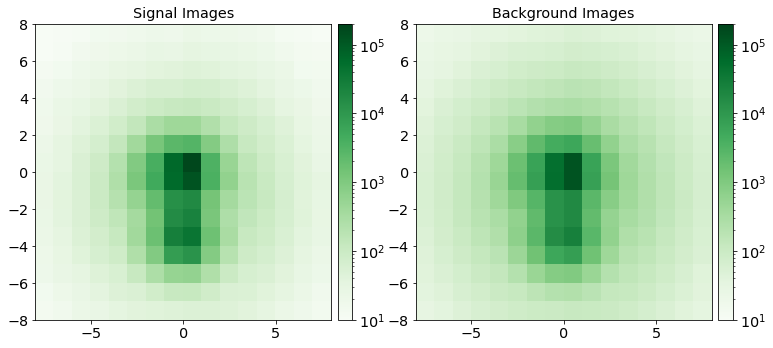

In [27]:
grid = 16
#plot train and test signal
sig_train_images = np.sum(data_train['jetImages'][ind_train_sig],axis=0).reshape(grid,grid)
sig_test_images = np.sum(data_test['jetImages'][ind_test_sig],axis=0).reshape(grid,grid)
bkg_train_images = np.sum(data_train['jetImages'][ind_train_bkg],axis=0).reshape(grid,grid)
bkg_test_images = np.sum(data_test['jetImages'][ind_test_bkg],axis=0).reshape(grid,grid)

extent_sig = [-sig_train_images.shape[1]/2., sig_train_images.shape[1]/2., -sig_train_images.shape[0]/2., sig_train_images.shape[0]/2. ]
extent_bkg = [-bkg_train_images.shape[1]/2., bkg_train_images.shape[1]/2., -bkg_train_images.shape[0]/2., bkg_train_images.shape[0]/2. ]

# Build figure with train and test set 
fig = plt.figure(figsize = (12.5,8))
ax1 = fig.add_subplot(121)
im0 = ax1.imshow(sig_train_images,
                      interpolation='nearest',
#                      origin='low',
                      cmap = 'Greens',
                      norm=LogNorm(),
                     vmin = 10,
                     vmax = 200000,
                      extent = extent_sig)
ax1.set_title('Signal Images')
fig.colorbar(im0,
             fraction=0.0467, pad=0.02,
             ax=ax1)
# im1 = ax[1][0].imshow(sig_test_images,
#                       interpolation='nearest',
#                       origin='low',
#                       cmap = 'Greens',
#                       norm=LogNorm(),
#                      vmin = 1,
#                      vmax = 20000)
# ax[1][0].set_title('Test Signal Images')
# fig.colorbar(im1,shrink=0.8, ax=ax[1][0])
ax2 = fig.add_subplot(122)
im2 = ax2.imshow(bkg_train_images,
                      interpolation='nearest',
#                      origin='low',
                      cmap = 'Greens',
                      norm=LogNorm(),
                     vmin = 10,
                     vmax = 200000,
                      extent = extent_bkg)
ax2.set_title('Background Images')
fig.colorbar(im2,
             fraction=0.0467, pad=0.02,
             ax=ax2)
# im3 = ax[1][1].imshow(bkg_test_images,
#                       interpolation='nearest',
#                       origin='low',
#                       cmap = 'Greens',
#                       norm=LogNorm(),
#                      vmin = 1,
#                      vmax = 20000)
# ax[1][1].set_title('Test Background Images')
# fig.colorbar(im3,shrink=0.8, ax=ax[1][1])
#plt.show()
plt.savefig('plots/histogram/jet_images.png')

### jetPt

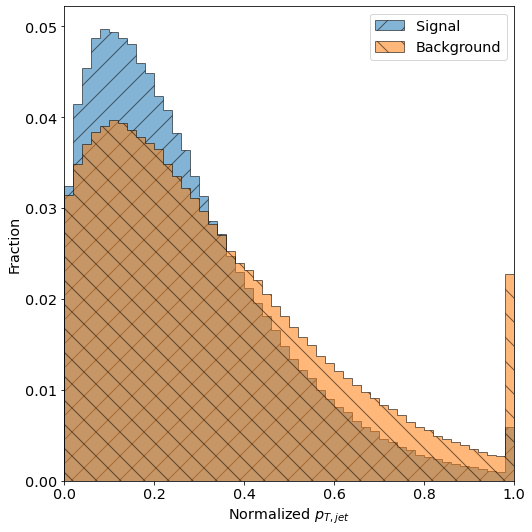

In [66]:
Draw_HistoGram('jetPt', 50, 0, 1)

### jetEta

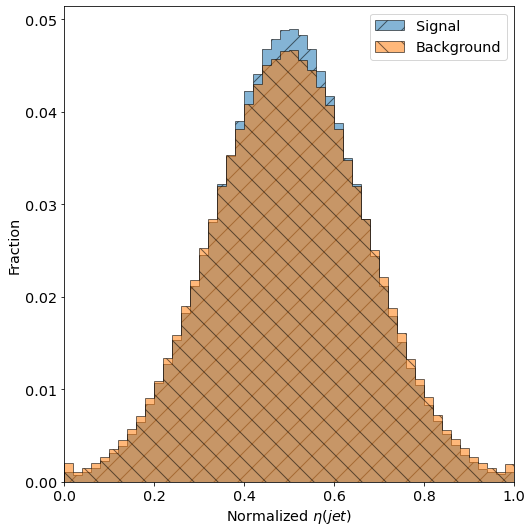

In [67]:
Draw_HistoGram('jetEta', 50, 0, 1)

### jetPhi

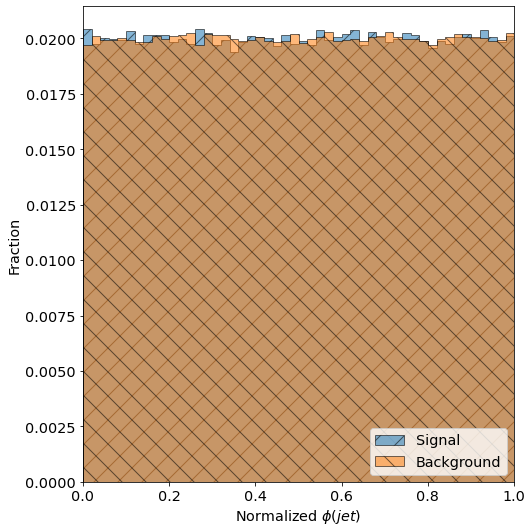

In [69]:
Draw_HistoGram('jetPhi',50, 0, 1, legend_loc = 'lower right')

### jetMass

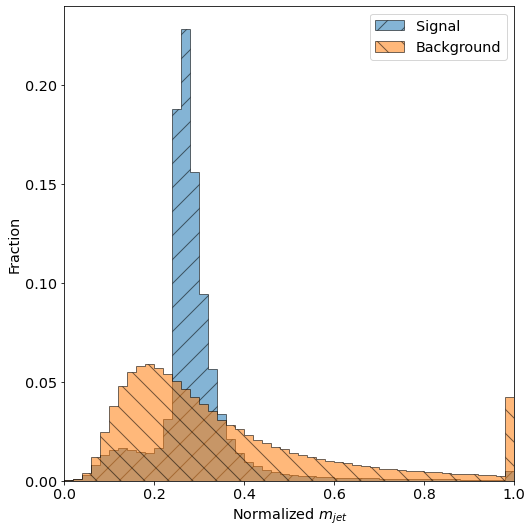

In [31]:
Draw_HistoGram('jetMass',50, 0, 1)

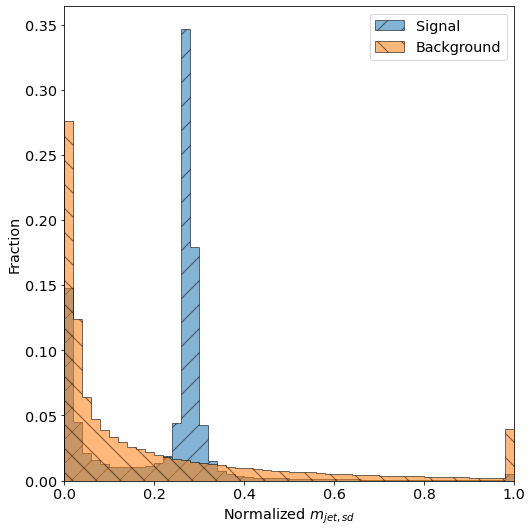

In [32]:
Draw_HistoGram('jetMassSD',50, 0, 1)

### tau1

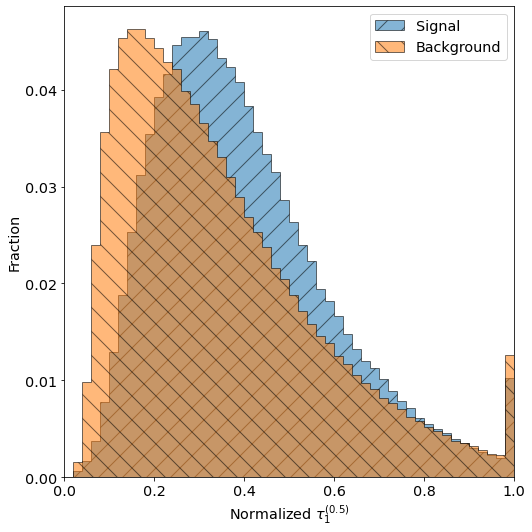

In [33]:
Draw_HistoGram('tau1_b05',50, 0, 1)

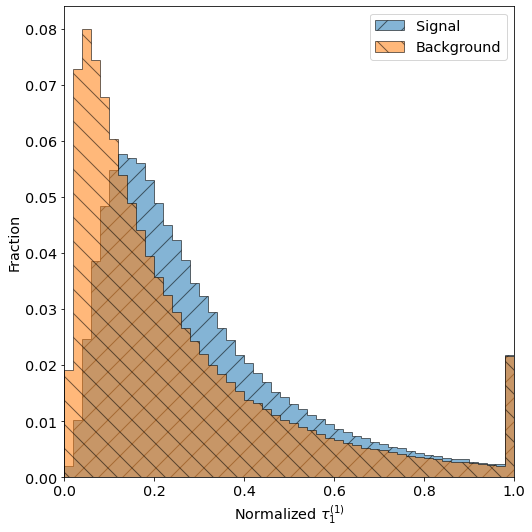

In [34]:
Draw_HistoGram('tau1_b10',50, 0, 1)

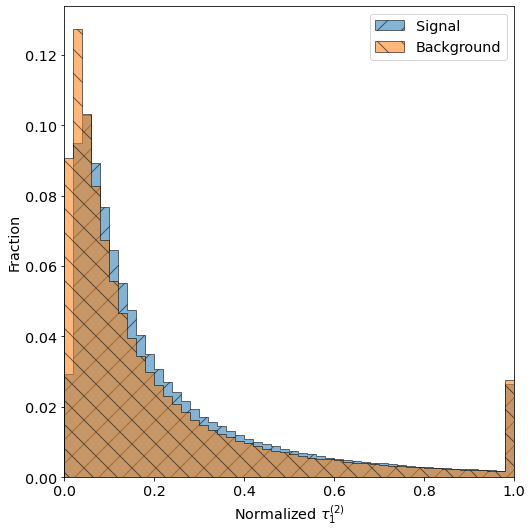

In [35]:
Draw_HistoGram('tau1_b20',50, 0, 1)

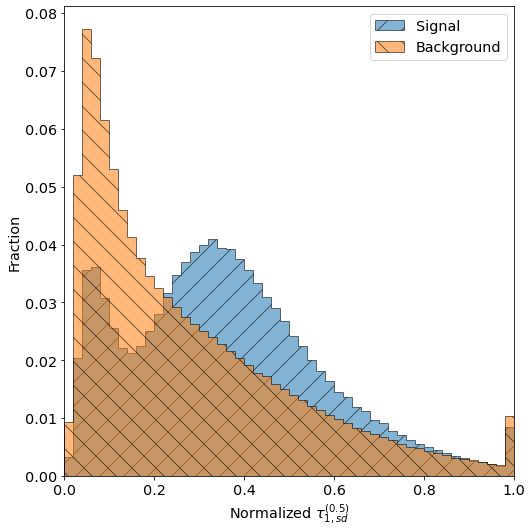

In [36]:
Draw_HistoGram('tau1_sd_b05',50, 0, 1)

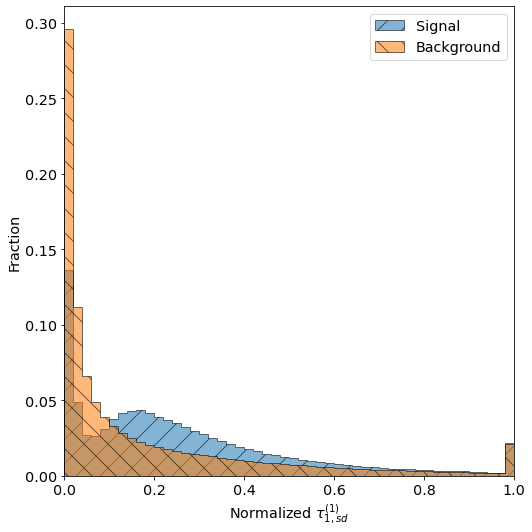

In [37]:
Draw_HistoGram('tau1_sd_b10',50, 0, 1)

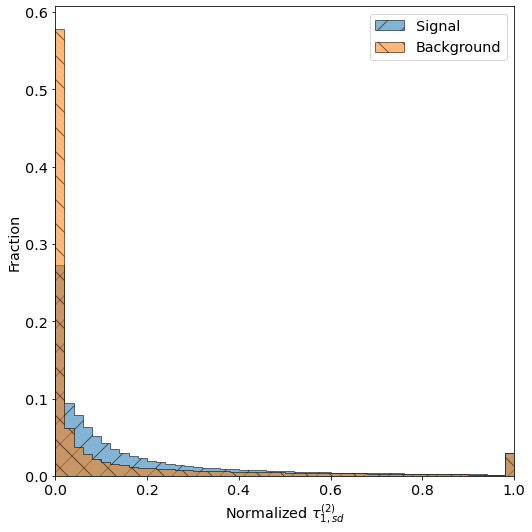

In [38]:
Draw_HistoGram('tau1_sd_b20',50, 0, 1)

### tau2

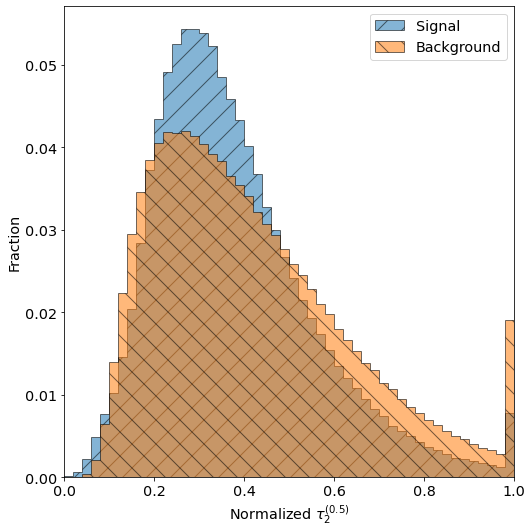

In [39]:
Draw_HistoGram('tau2_b05',50, 0, 1)

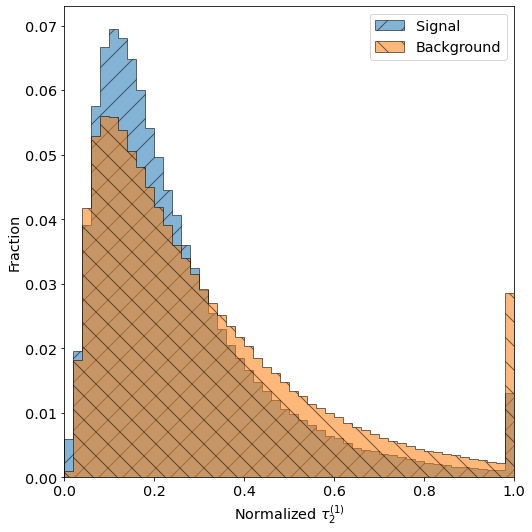

In [40]:
Draw_HistoGram('tau2_b10',50, 0, 1)

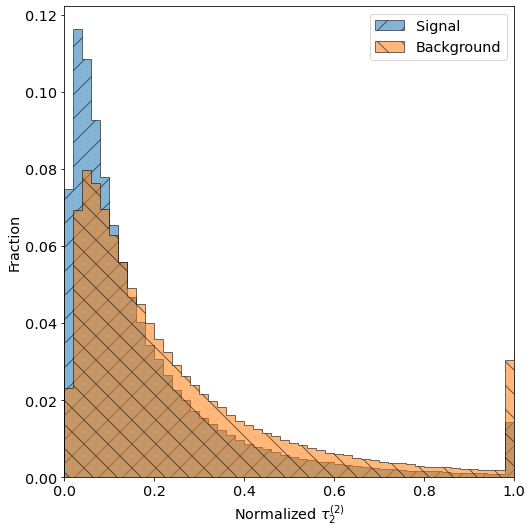

In [41]:
Draw_HistoGram('tau2_b20',50, 0, 1)

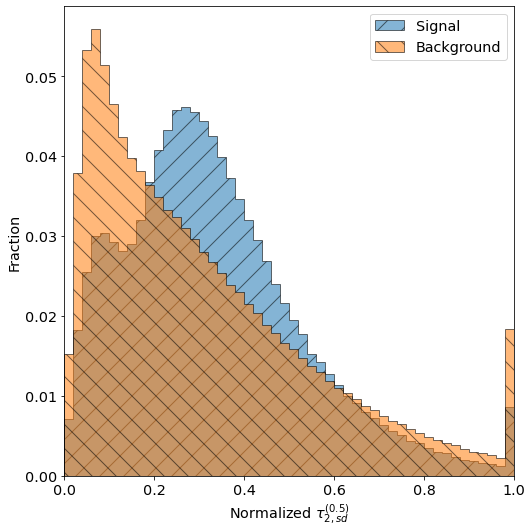

In [42]:
Draw_HistoGram('tau2_sd_b05',50, 0, 1)

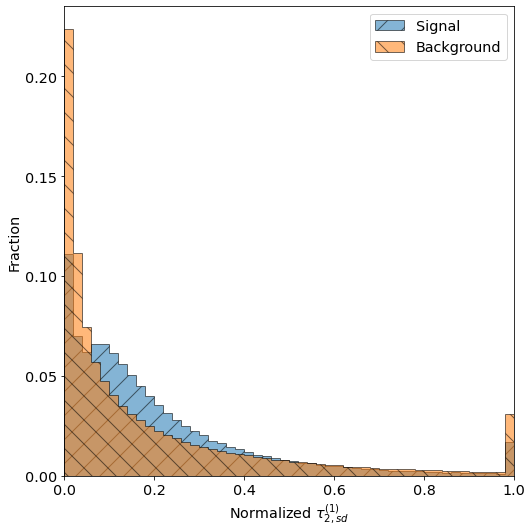

In [43]:
Draw_HistoGram('tau2_sd_b10',50, 0, 1)

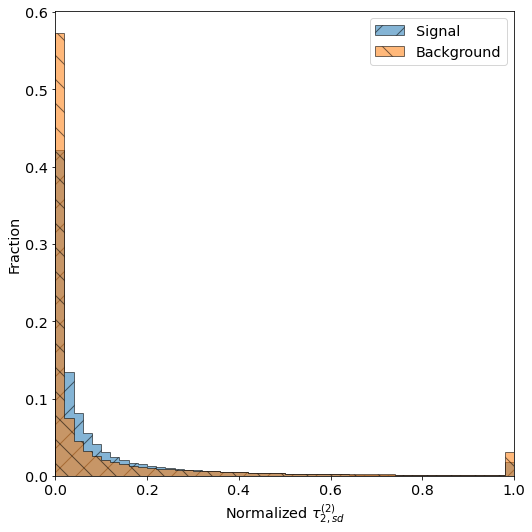

In [44]:
Draw_HistoGram('tau2_sd_b20',50, 0, 1)

### tau3

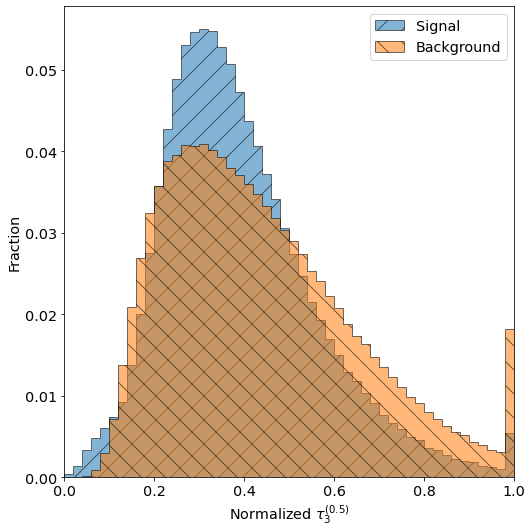

In [45]:
Draw_HistoGram('tau3_b05',50, 0, 1)

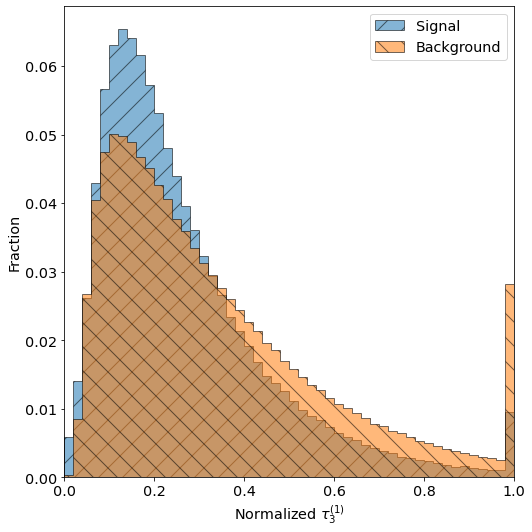

In [46]:
Draw_HistoGram('tau3_b10',50, 0, 1)

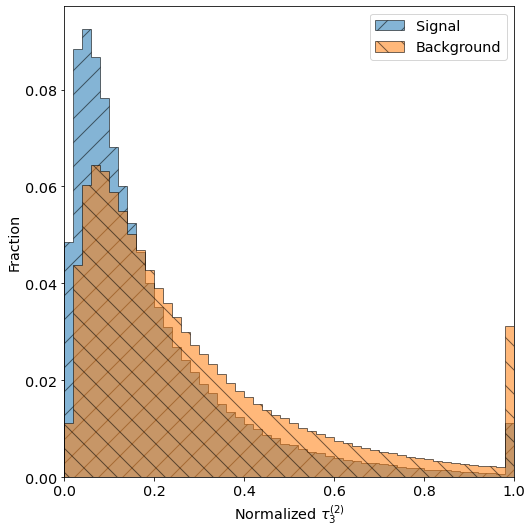

In [47]:
Draw_HistoGram('tau3_b20',50, 0, 1)

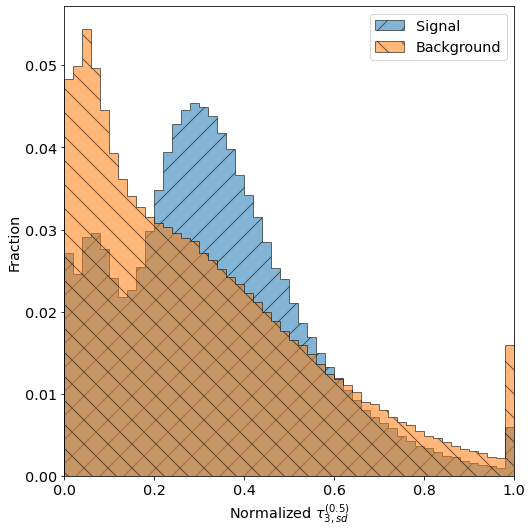

In [48]:
Draw_HistoGram('tau3_sd_b05',50, 0, 1)

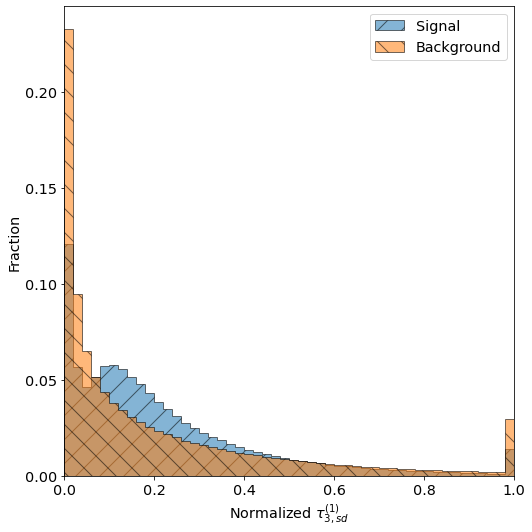

In [49]:
Draw_HistoGram('tau3_sd_b10',50, 0, 1)

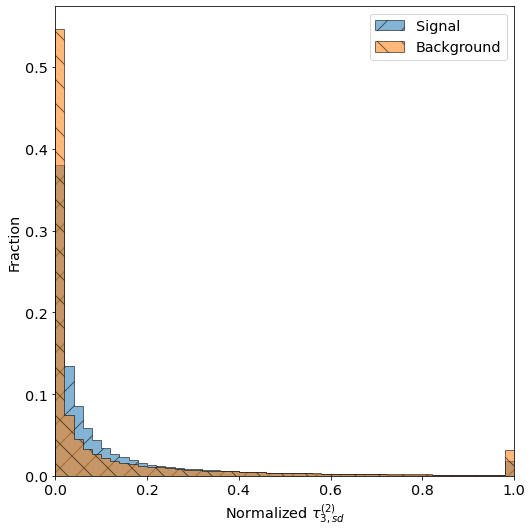

In [50]:
Draw_HistoGram('tau3_sd_b20',50, 0, 1)

## beta_3

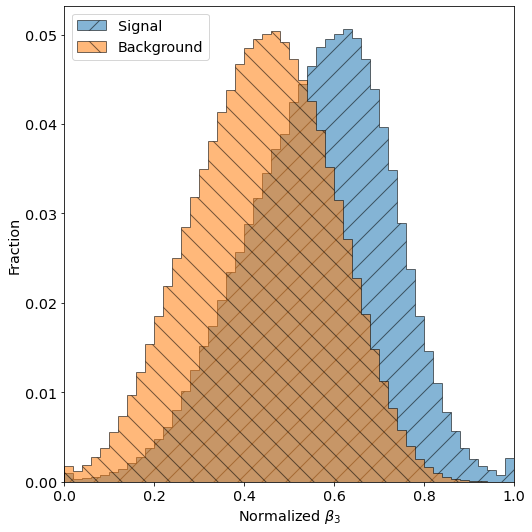

In [71]:
Draw_HistoGram('beta3',50, 0, 1, legend_loc = 'upper left')

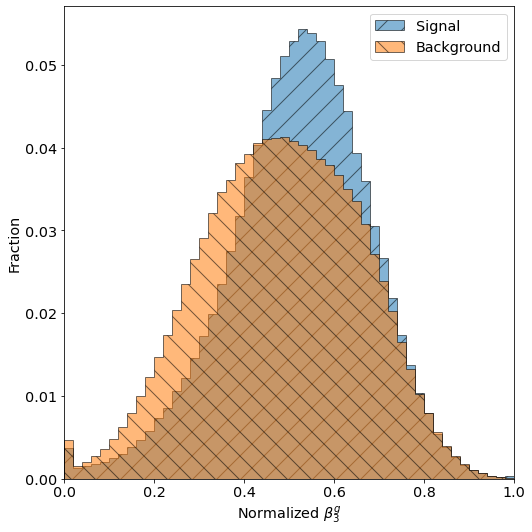

In [52]:
Draw_HistoGram('beta3_sd',50, 0, 1)

## tau21

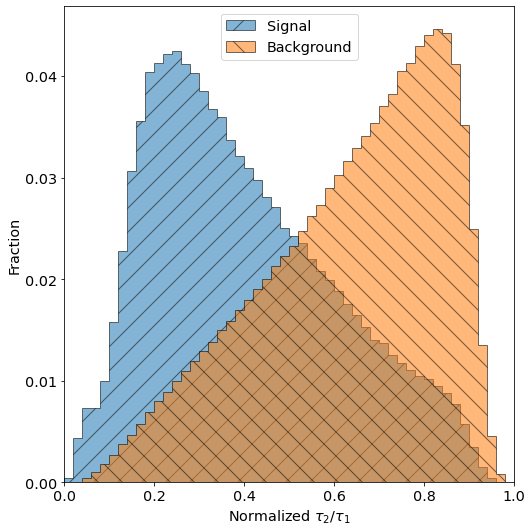

In [70]:
Draw_HistoGram('tau21',50, 0, 1, legend_loc = 'upper center')

### charge Multiplicity

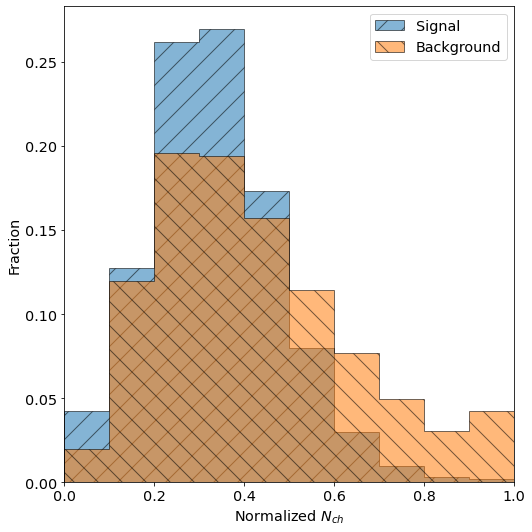

In [54]:
Draw_HistoGram('chMult',10, 0, 1)

### neutral Multiplicity

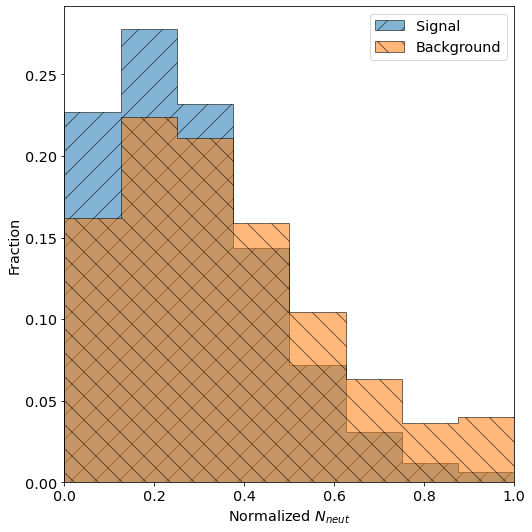

In [55]:
Draw_HistoGram('neutMult',8, 0, 1)

### photon Multiplicity

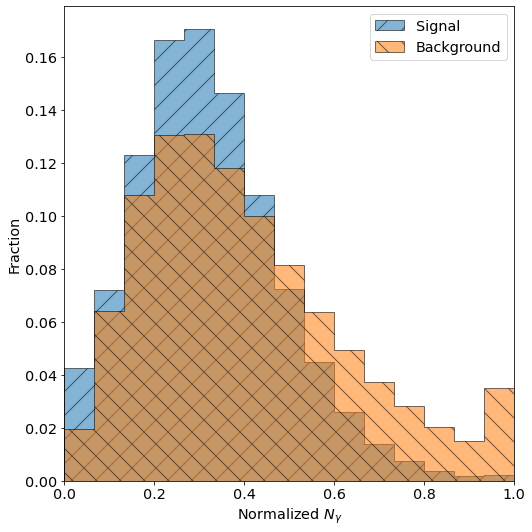

In [56]:
Draw_HistoGram('phoMult',15, 0, 1)

### electron Multiplicity

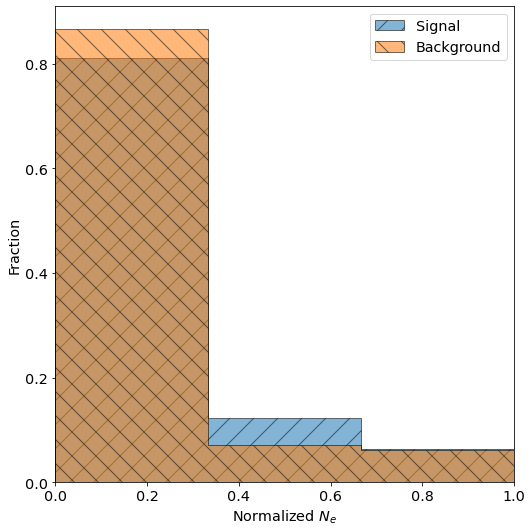

In [57]:
Draw_HistoGram('eleMult',3, 0, 1)

### muon Mult

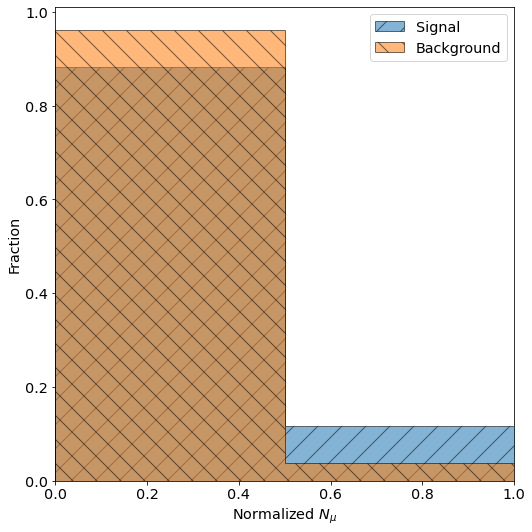

In [58]:
Draw_HistoGram('muMult',2, 0, 1)

### jetpull

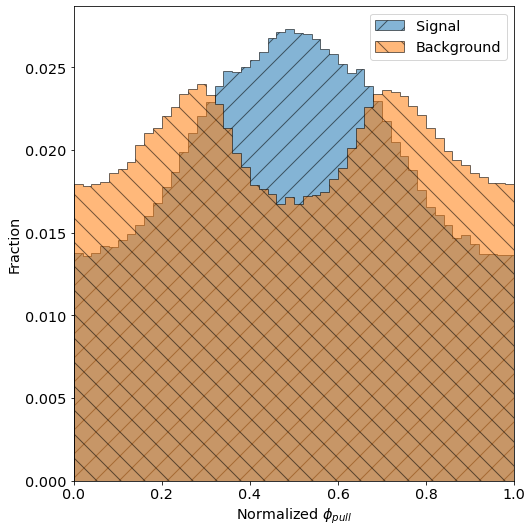

In [59]:
Draw_HistoGram('jetpull',50, 0, 1)

## Save Test and Train Data

In [60]:
np.savez('../data/ShowJet_final_train.npz',**data_train)
np.savez('../data/ShowJet_final_test.npz',**data_test)